In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
base_dir = "/cluster/work/bewi/members/rquiles/zeroshot_amr/experiments/results"
fps = ["MACCS", "morgan_1024", "morgan_512"]
files = [f"{base_dir}/{fp}/metrics.csv" for fp in fps]
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
print(df.columns)

Index(['Fingerprint', 'Embedding', 'Set', 'Balanced_Accuracy', 'MCC'], dtype='object')


/scratch/tmp.54150781.rquiles/ipykernel_822683/1160731004.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


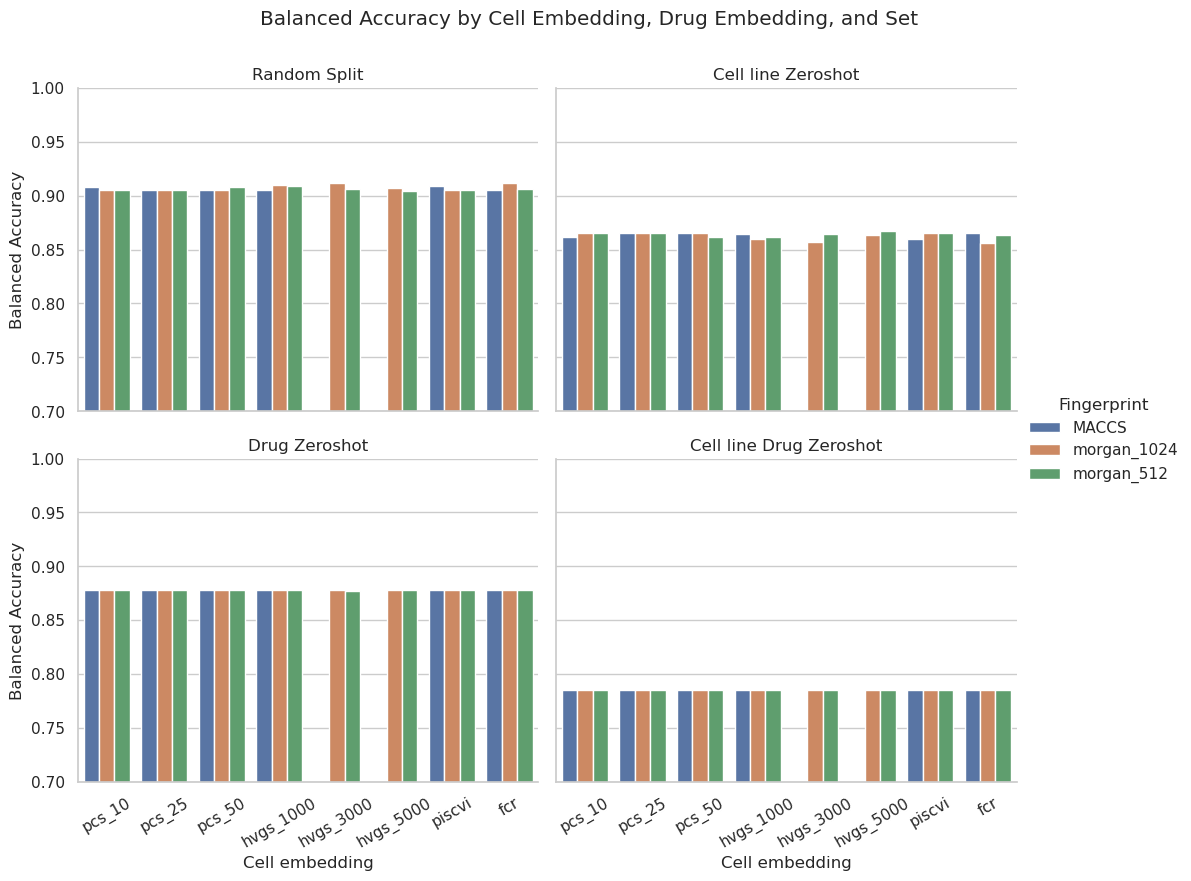

In [79]:
# Balanced Accuracy Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

embedding_order = [
    "pcs_10",
    "pcs_25",
    "pcs_50",
    "hvgs_1000",
    "hvgs_3000",
    "hvgs_5000",
    "piscvi",
    "fcr"
]

g = sns.catplot(
    data=df,
    kind="bar",
    x="Embedding",
    y="Balanced_Accuracy",
    hue="Fingerprint",
    col="Set",
    col_wrap=2,
    height=4,
    aspect=1.3,
    ci=None,
    order=embedding_order
)

g.set_axis_labels("Cell embedding", "Balanced Accuracy")
g.set_titles("{col_name}")
g.set(ylim=(0.7, 1.0))
g.fig.suptitle("Balanced Accuracy by Cell Embedding, Drug Embedding, and Set", y=1.05)
for ax in g.axes.flat:
    # plt.xticks(rotation=30)
    ax.tick_params(axis="x", labelrotation=30)

plot_name = "Bal_Acc_Histogram.jpg"
g.fig.savefig(os.path.join(base_dir, plot_name), dpi=300, bbox_inches="tight")
plt.show()
plt.close(g.fig)

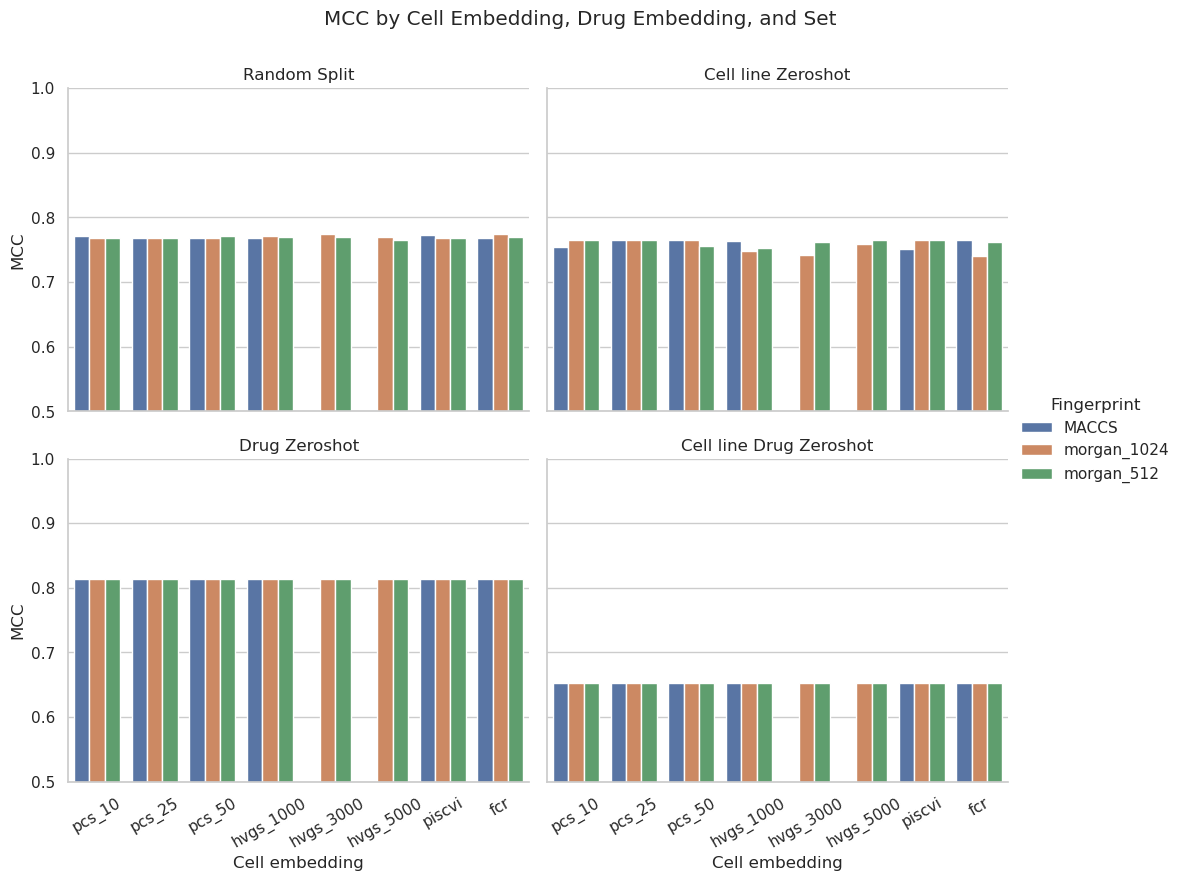

In [80]:
# MCC Barplot
g = sns.catplot(
    data=df,
    kind="bar",
    x="Embedding",
    y="MCC",
    hue="Fingerprint",
    col="Set",
    col_wrap=2,
    height=4,
    aspect=1.3,
    order=embedding_order
)

g.set_axis_labels("Cell embedding", "MCC")
g.set_titles("{col_name}")
g.set(ylim=(0.5, 1.0))
g.fig.suptitle("MCC by Cell Embedding, Drug Embedding, and Set", y=1.05)
for ax in g.axes.flat:
    # plt.xticks(rotation=30)
    ax.tick_params(axis="x", labelrotation=30)

plot_name = "MCC_Histogram.jpg"
g.fig.savefig(os.path.join(base_dir, plot_name), dpi=300, bbox_inches="tight")
plt.show()
plt.close(g.fig)

## Per cell line Analysis

In [2]:
base_dir = "/cluster/work/bewi/members/rquiles/zeroshot_amr/experiments/results"
fps = ["MACCS", "morgan_1024", "morgan_512"]
files = [f"{base_dir}/{fp}/mcc_per_cellline_{fp}.csv" for fp in fps]
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
df["cell_line"] = df["cell_line"].apply(lambda x: x.replace("'", "").replace("(", "").replace(")","").replace(",",""))
df = df.rename(columns={
    "zero_shot_split_type": "Set",
    "drug_embedding": "Fingerprint",
    "cell_embedding": "Embedding",
    "cell_line": "Cell Line"
})

In [3]:
# MCC per Cell Line Barplot
sns.set_theme(style="whitegrid")

def plot_mcc_by_cell_line(df, set_name):
    df = df[df["Set"] == set_name]
    g = sns.catplot(
        data=df,
        kind="bar",
        x="Cell Line",
        y="MCC",
        col="Fingerprint",
        hue="Embedding",
        col_wrap=3,
        height=4,
        aspect=1.3,
    )
    
    g.set_axis_labels("Cell Line", "MCC")
    g.set_titles("{col_name}")
    g.set(ylim=(0.5, 1.0))
    g.fig.suptitle(f"MCC per Cell Line ({set_name})", y=1.05)
    for ax in g.axes.flat:
        # plt.xticks(rotation=30)
        ax.tick_params(axis="x", labelrotation=30)
    
    plot_name = f"MCC_by_cell_line_{set_name}.jpg"
    g.fig.savefig(os.path.join(base_dir, plot_name), dpi=300, bbox_inches="tight")
    plt.show()
    plt.close(g.fig)

In [4]:
df["Set"].unique()

array(['Random Split', 'Cell line Zeroshot', 'Drug Zeroshot',
       'Cell line Drug Zeroshot'], dtype=object)

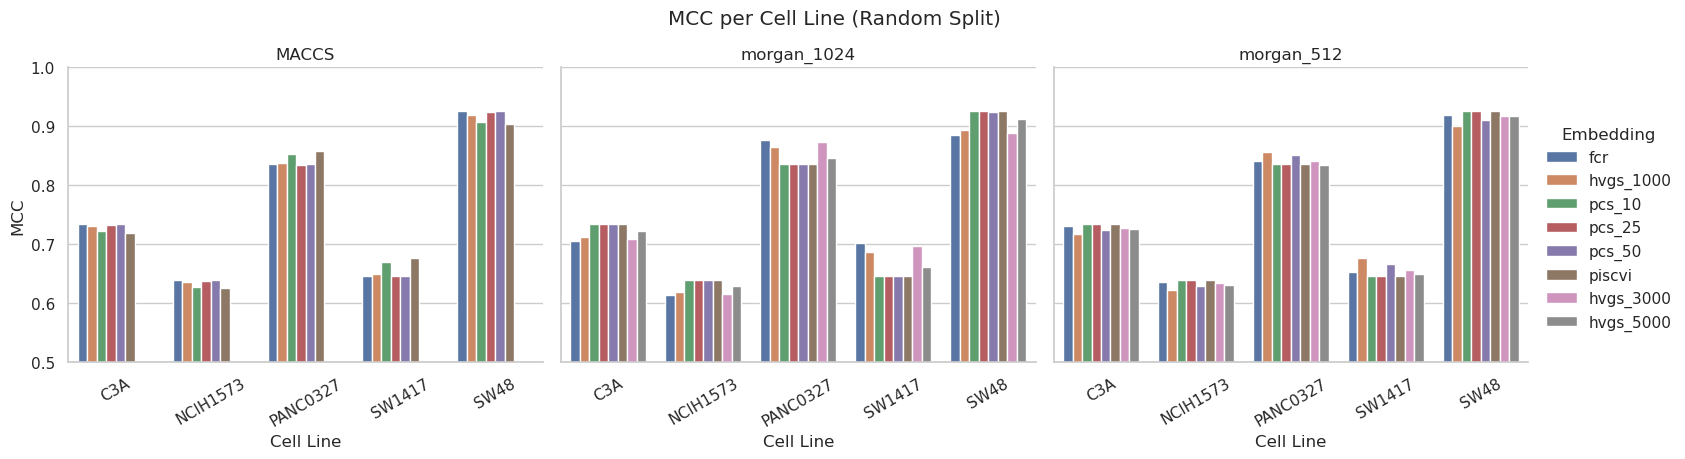

In [5]:
plot_mcc_by_cell_line(df, "Random Split")

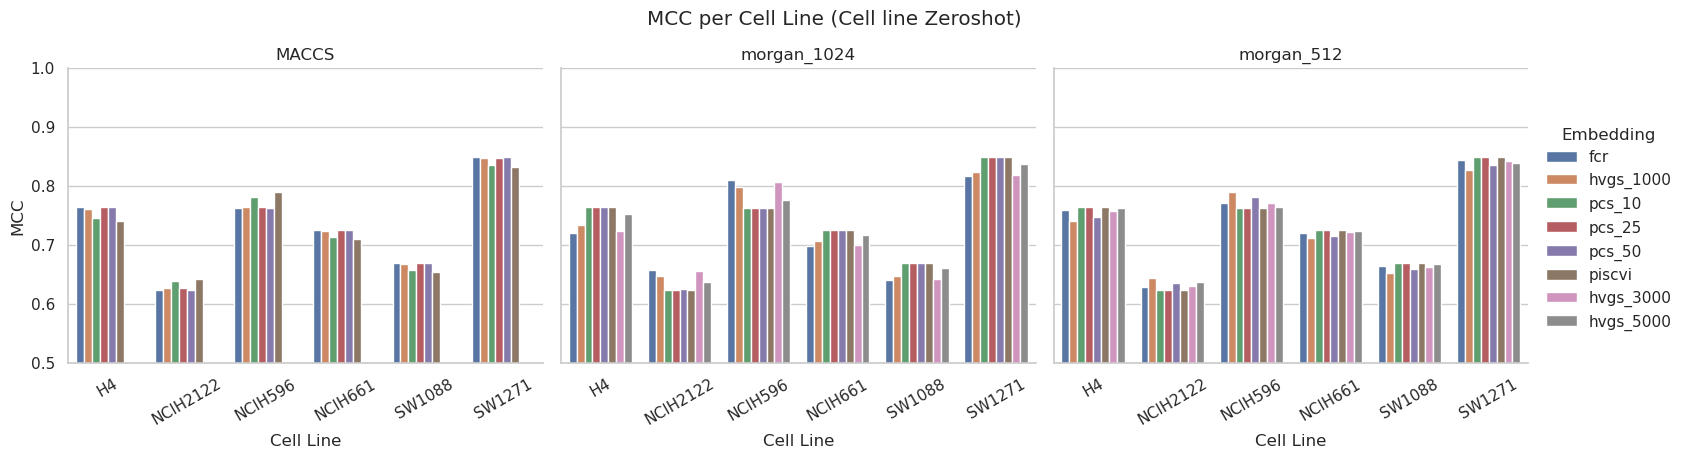

In [6]:
plot_mcc_by_cell_line(df, "Cell line Zeroshot")

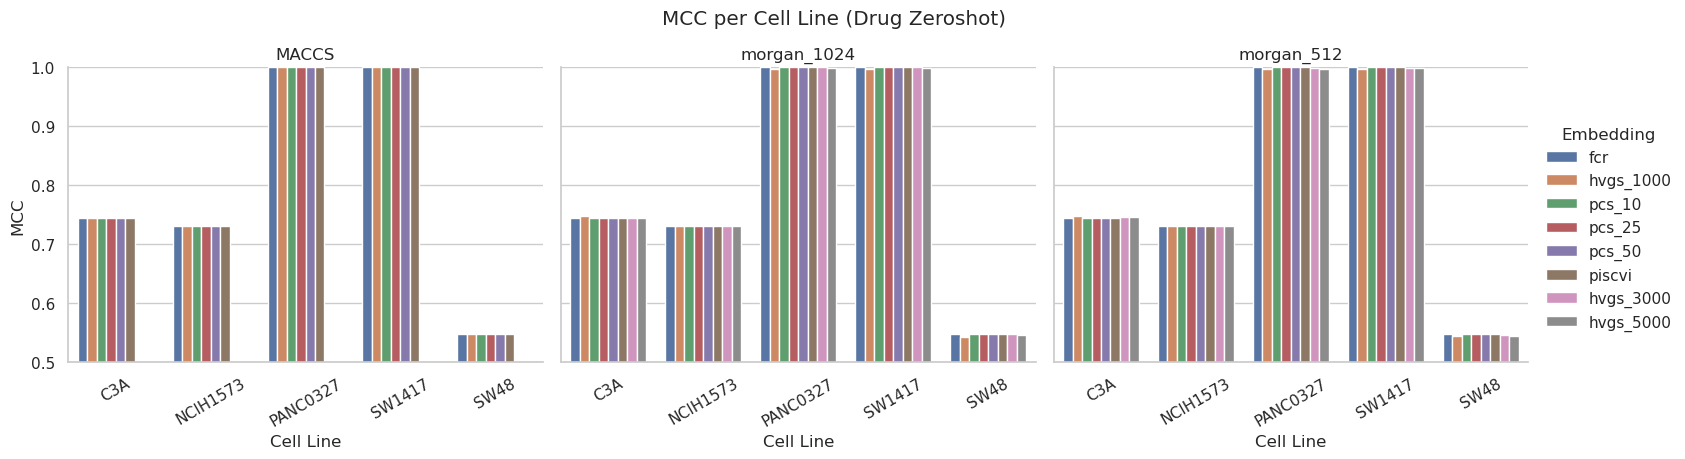

In [7]:
plot_mcc_by_cell_line(df, "Drug Zeroshot")

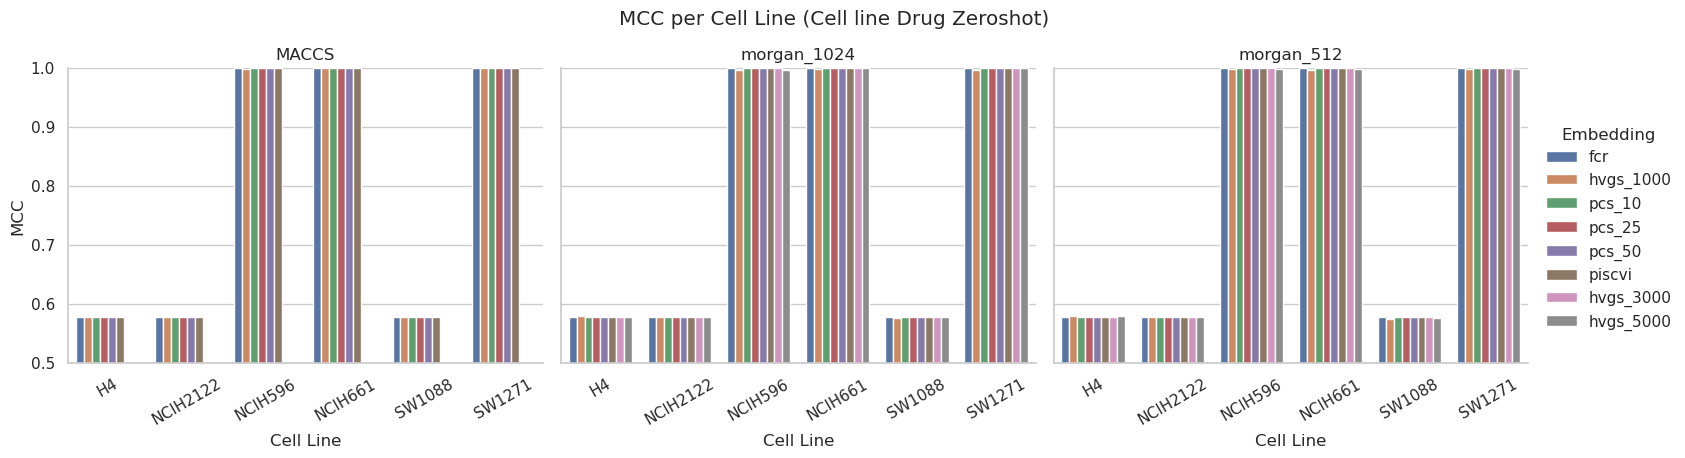

In [8]:
plot_mcc_by_cell_line(df, "Cell line Drug Zeroshot")